In [1]:
from clustering.preprocess import Preprocess
from clustering.kmeans import KMeansClustering
from clustering.lda import LDA
import logging
logging.getLogger().setLevel(logging.INFO)

In [2]:
data_dev = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_dev.csv")
data_train = Preprocess.open_csv("F:\Thesis\data\SemEval\hateval2019_en_train.csv")
HS = '1'
TR = '1'
AG = '0'
filtered_dev = Preprocess.filter_sem_eval(X=data_dev, HS=HS, TR=TR, AG=AG)
filtered_train = Preprocess.filter_sem_eval(X=data_train, HS=HS, TR=TR, AG=AG)
filtered_data = filtered_dev + filtered_train
tweets = [x[1] for x in filtered_data]
cleaned_data = Preprocess.clean(X=tweets)
km = KMeansClustering()
X = km.fit_tfidf(cleaned_data)
X = km.fit_lsa(X)

INFO:root:Original data length: 1000
INFO:root:After applying filters: 110
INFO:root:Data length after removing invalid tweets: 31
INFO:root:Original data length: 9000
INFO:root:After applying filters: 869
INFO:root:Data length after removing invalid tweets: 340
INFO:root:Explained variance of the SVD step: 49%


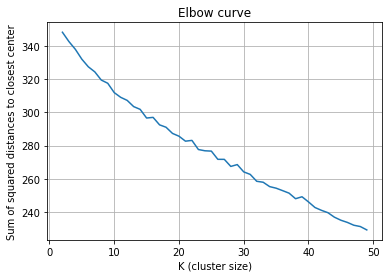

In [3]:
%matplotlib inline
km.plot_elbow_curve(max_k=50, X=X)

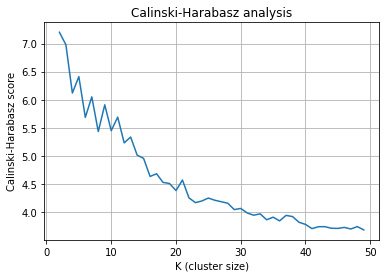

In [4]:
%matplotlib inline
# Higher values are better, when clusters are dense and well separated
km.plot_calinski_harabasz_analysis(max_k=50, X=X)

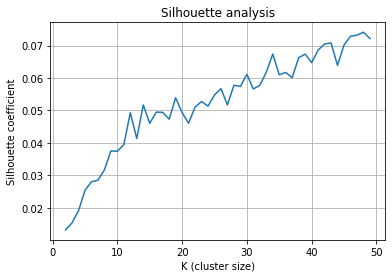

In [5]:
%matplotlib inline
# Higher values are better
km.plot_silhouette_analysis(max_k=50, X=X)

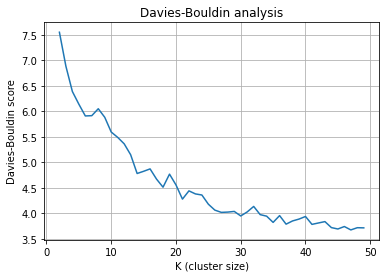

In [6]:
%matplotlib inline
# Values close to zero indicate a better partition
km.plot_davies_bouldin_score_analysis(max_k=50, X=X)

In [7]:
K = 5
km.cluster(X= X, K=K)
km.print_top_terms()

Cluster 0:
 bitch whore like pussy don slut ass girlfriend just hoes

Cluster 1:
 hoe bitch ass pussy fucking know just like im stupid

Cluster 2:
 dick skank bitch ass girl ugly nigga suck night got

Cluster 3:
 fucking cunt bitch stupid fuck whore shit ass like mother

Cluster 4:
 woman hysterical booker kamala bitch harris said cunt middle gonna



In [8]:
NUM_SAMPLES=10
km.cluster(X= X, K=K)
km.print_most_representative_samples(original_data=filtered_data, X=X, num_samples=NUM_SAMPLES)

Cluster 0: most representative sample indices: [277 297 366  24  40 351 259 276 356  17]
['6033', 'FUCKING FUCK SHIT PISS MOTHERFUCKING BITCH TIT CUNT FUCKING SLUT', '1', '1', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['6149', 'Bitch had the NERVE to leave the fucking box in the mail room you fucking cunt bitch fuck', '1', '1', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['9101', 'You fucking bitch hoe', '1', '1', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['19110', 'If I ever hit you w dumb fucking cunt ass fucking stupid ass fucking bitch just know Im extremely mad at you.', '1', '1', '0']

['4744', 'All you fucking faggots were laughing at her too with that other fucking dumb cunt liberal Ellen DeGeneres', '1', '1', '0', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

['8907', 'fucking cunt whore slut pussy bitch fuck you', '1', '1', '0', '', '', '', '', '', '', '', '', 

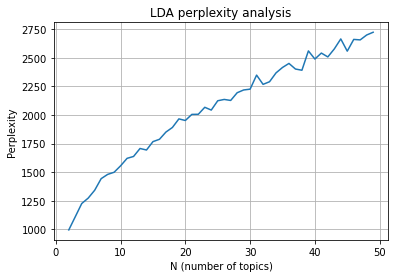

In [9]:
lda = LDA()
X = lda.fit_tf(X=cleaned_data)
# Lower values are better
# Perplexity indicates how well the probability model predicts the samples
lda.plot_perplexity(max_n=50, X=X)

In [10]:
pred = lda.fit_lda(X=X, n_components=10)
lda.print_top_terms()

Topic:  0
['bitch', 'hoe', 'fucking', 'know', 'im', 'ass', 'woman', 'like', 'just', 'dont']
Topic:  1
['bitch', 'ass', 'dick', 'nigga', 'fucking', 'don', 'pussy', 'gonna', 'eat', 'really']
Topic:  2
['bitch', 'whore', 'youre', 'girl', 'know', 'really', 'hoe', 've', 'like', 'real']
Topic:  3
['woman', 'hysterical', 'don', 'vagina', 'like', 'sexist', 'ass', 'yo', 'talking', 'booker']
Topic:  4
['bitch', 'dick', 'girl', 'like', 'hoe', 'lil', 'ass', 'cunt', 'think', 'just']
Topic:  5
['bitch', 'hoe', 'ass', 'like', 'love', 'fake', 'buy', 'fuck', 'skank', 'ain']
Topic:  6
['bitch', 'like', 'girlfriend', 'fucking', 'cunt', 'hoes', 'love', 'talk', 'fuck', 'pussy']
Topic:  7
['bitch', 'stupid', 'don', 'fuck', 'cunt', 'shit', 'fucking', 'slut', 'just', 'want']
Topic:  8
['bitch', 'whore', 'pussy', 'fucking', 'cunt', 'fuck', 'ass', 'doesn', 'think', 'hoe']
Topic:  9
['ass', 'bitch', 'skank', 'fucking', 'say', 'got', 'hoe', 'goin', 'like', 'right']
